In [65]:
#There are 2 ratings which should i choose?

In [66]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [67]:
legoData = pd.read_csv("merged_lego_dataset.csv")
legoData.head()

,set_id,set_name,release_year,theme_id,num_parts,num_figs,retail_price,num_unique_figs,set_rating,retire_month,...,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,60244-1,Police Helicopter Transport,2020,61,317,4,39.99,3,4.6,Oct-21,...,Box,6,Retail,317.0,4.0,925.0,0.0,49.99,4.0,19.8000
1,60248-1,Fire Helicopter Response,2020,58,93,3,17.99,0,4.4,Nov-21,...,Box,2,Retail,93.0,3.0,1137.0,2.3,29.99,1.0,9.9900
2,60252-1,Construction Bulldozer,2020,56,126,2,17.99,0,4.5,Nov-21,...,Box,4,Retail,126.0,2.0,2606.0,3.8,19.99,9.0,18.5000
3,60254-1,Race Boat Transporter,2020,52,239,2,24.99,0,4.6,Nov-21,...,Box,4,Retail,238.0,2.0,2245.0,4.0,29.99,2.0,28.0000
4,60258-1,Tuning Workshop,2020,52,897,7,89.99,6,4.6,Nov-21,...,Box,12,Retail,897.0,7.0,3111.0,4.1,99.99,11.0,73.4902


## Categorical Predictors :
### Visualising Categorical Data against Retire Price

In [68]:
# Categorical Predictors
categoricalData = legoData[['set_id','set_name','release_year','theme_id','num_figs','num_unique_figs','set_rating','retire_month','Packaging','Num_Instructions','Availability','Minifigures','Rating']]
categoricalData

,set_id,set_name,release_year,theme_id,num_figs,num_unique_figs,set_rating,retire_month,Packaging,Num_Instructions,Availability,Minifigures,Rating
0,60244-1,Police Helicopter Transport,2020,61,4,3,4.6,Oct-21,Box,6,Retail,4.0,0.0
1,60248-1,Fire Helicopter Response,2020,58,3,0,4.4,Nov-21,Box,2,Retail,3.0,2.3
2,60252-1,Construction Bulldozer,2020,56,2,0,4.5,Nov-21,Box,4,Retail,2.0,3.8
3,60254-1,Race Boat Transporter,2020,52,2,0,4.6,Nov-21,Box,4,Retail,2.0,4.0
4,60258-1,Tuning Workshop,2020,52,7,6,4.6,Nov-21,Box,12,Retail,7.0,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,75142-1,Homing Spider Droid,2016,158,4,1,4.8,Jun-17,Box,2,Retail,5.0,3.7
718,75145-1,Eclipse Fighter,2016,158,2,1,4.7,Nov-17,Box,2,Retail,2.0,3.8
719,75146-1,Star Wars Advent Calendar 2016,2016,209,10,4,4.5,Nov-16,Box,1,Retail,11.0,3.9
720,75147-1,StarScavenger,2016,158,4,3,4.7,Dec-17,Box,2,Retail,4.0,3.5


### Release Year Vs Retire Price

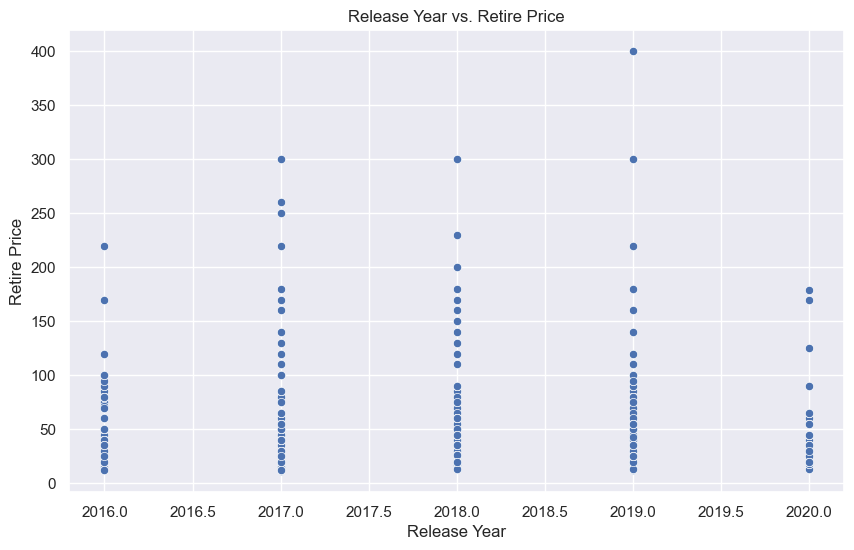

In [69]:
# Scatter plot for Release Year vs. Retire Price
plt.figure(figsize=(10, 6))
sb.scatterplot(data=legoData, x='release_year', y='retail_price')
plt.title('Release Year vs. Retire Price')
plt.xlabel('Release Year')
plt.ylabel('Retire Price')
plt.show()

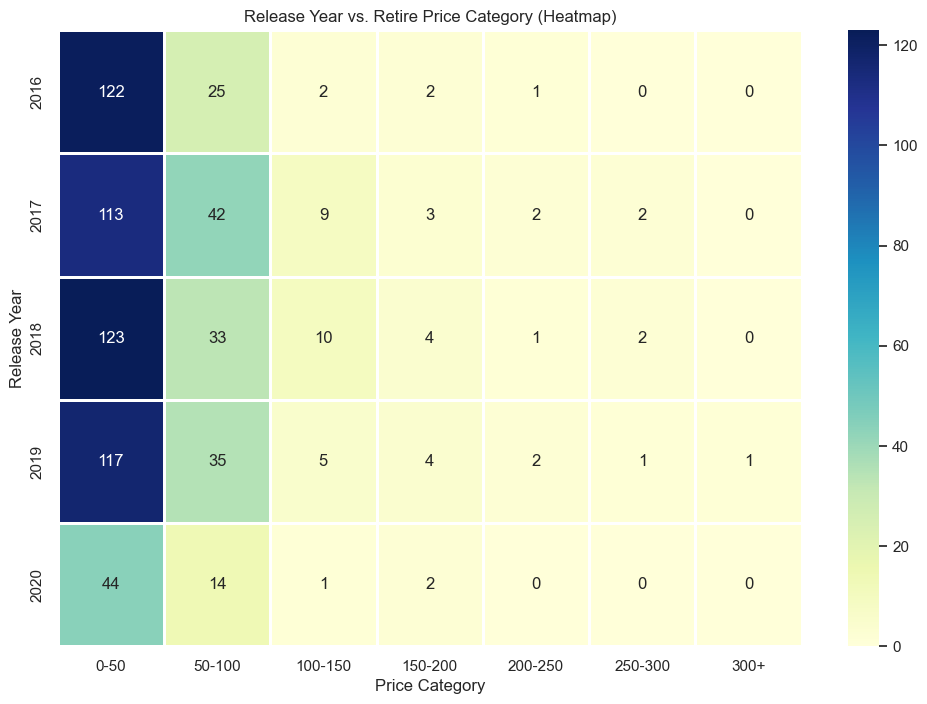

In [70]:
# Define the bin edges for retail price categories
price_bins = [0, 50, 100, 150, 200, 250, 300, np.inf]  # Define your own bin edges as needed
price_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300+']

# Bin the retail prices
legoData['price_category'] = pd.cut(legoData['retail_price'], bins=price_bins, labels=price_labels, right=False)

# Create a pivot table for the heatmap
heatmap_pivot = legoData.pivot_table(index='release_year', columns='price_category', values='set_id', aggfunc='count', observed=False)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(data=heatmap_pivot, linewidths=1, annot=True, fmt='g', annot_kws={"size": 12}, cmap="YlGnBu")
plt.title('Release Year vs. Retire Price Category (Heatmap)')
plt.xlabel('Price Category')
plt.ylabel('Release Year')
plt.show()


### Theme ID Vs Retire Price

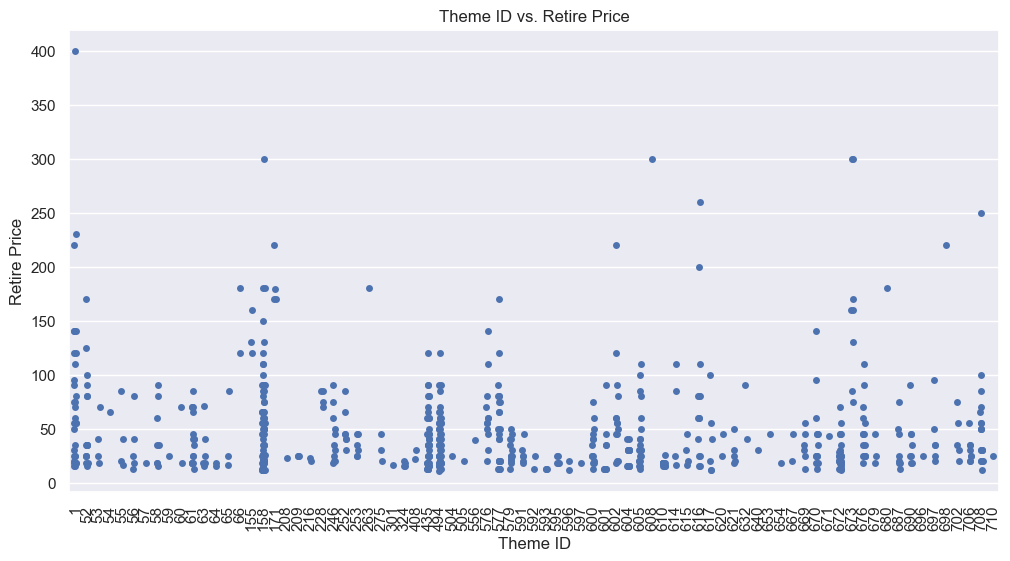

In [71]:
plt.figure(figsize=(12, 6))
sb.stripplot(data=legoData, x='theme_id', y='retail_price')
plt.title('Theme ID vs. Retire Price')
plt.xlabel('Theme ID')
plt.ylabel('Retire Price')
plt.xticks(rotation=90)
plt.show()


### Num of Figs and Num of Unique Figs Vs Retire Price

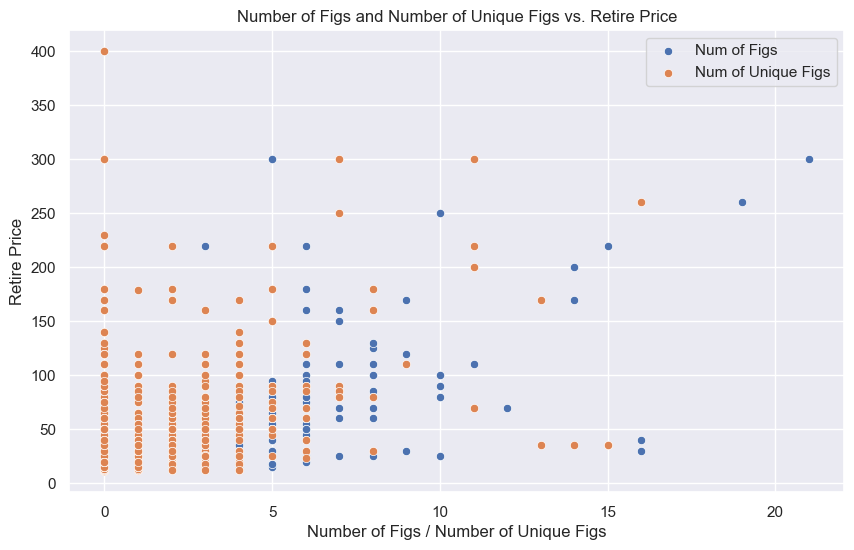

In [72]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=legoData, x='num_figs', y='retail_price', label='Num of Figs')
sb.scatterplot(data=legoData, x='num_unique_figs', y='retail_price', label='Num of Unique Figs')
plt.title('Number of Figs and Number of Unique Figs vs. Retire Price')
plt.xlabel('Number of Figs / Number of Unique Figs')
plt.ylabel('Retire Price')
plt.legend()
plt.show()


### Set Rating Vs Retire Price

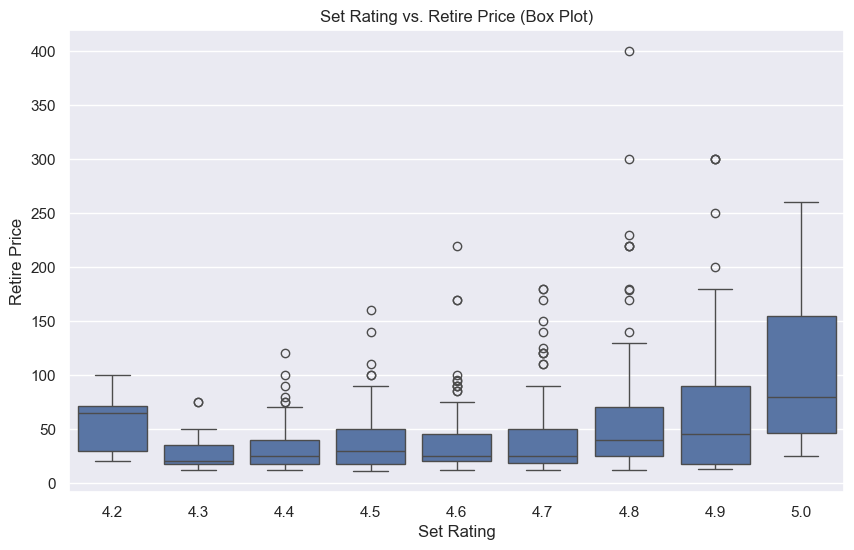

In [73]:
# Box plot for Set Rating vs. Retire Price
plt.figure(figsize=(10, 6))
sb.boxplot(data=legoData, x='set_rating', y='retail_price')
plt.title('Set Rating vs. Retire Price (Box Plot)')
plt.xlabel('Set Rating')
plt.ylabel('Retire Price')
plt.show()


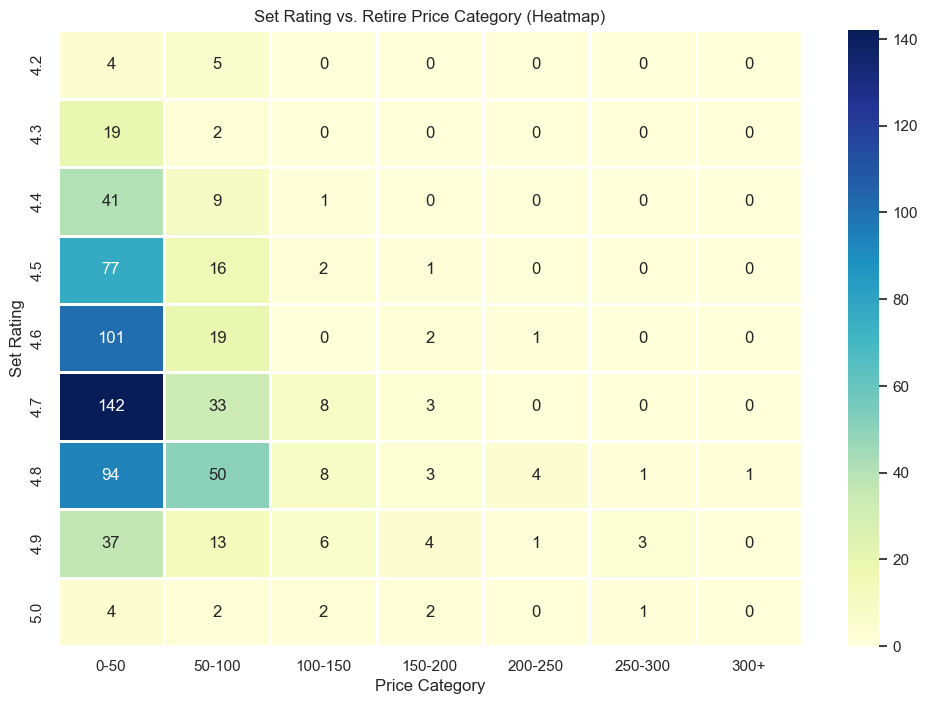

In [74]:
# Define the bin edges for retire price categories
price_bins = [0, 50, 100, 150, 200, 250, 300, np.inf]  # Define your own bin edges as needed
price_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300+']

# Bin the retire prices
legoData['price_category'] = pd.cut(legoData['retail_price'], bins=price_bins, labels=price_labels, right=False)

# Create a pivot table for the heatmap
heatmap_pivot = legoData.pivot_table(index='set_rating', columns='price_category', values='set_id', aggfunc='count', observed=False)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(data=heatmap_pivot, linewidths=1, annot=True, fmt='g', annot_kws={"size": 12}, cmap="YlGnBu")
plt.title('Set Rating vs. Retire Price Category (Heatmap)')
plt.xlabel('Price Category')
plt.ylabel('Set Rating')
plt.show()


### Retire Month Vs Retire Price

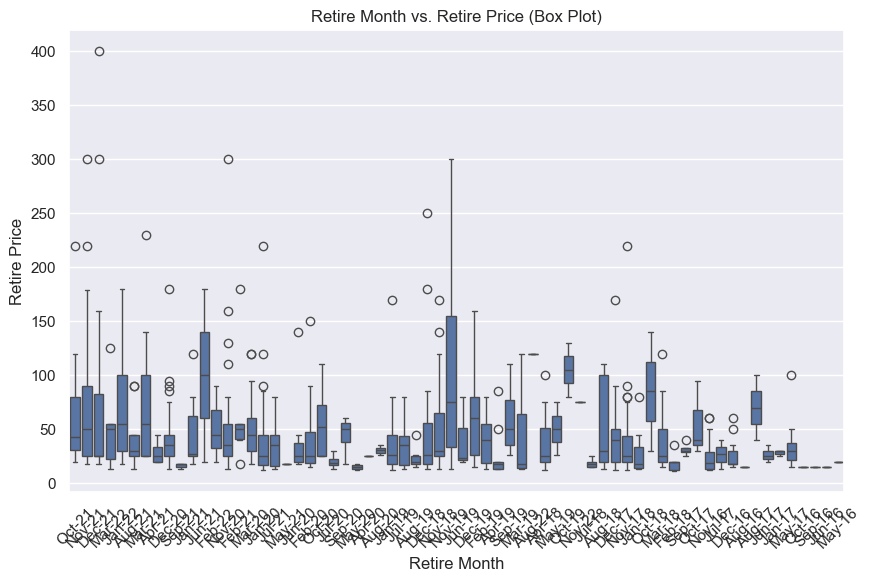

In [75]:
# Box plot for Retire Month vs. Retire Price
plt.figure(figsize=(10, 6))
sb.boxplot(data=legoData, x='retire_month', y='retail_price')
plt.title('Retire Month vs. Retire Price (Box Plot)')
plt.xlabel('Retire Month')
plt.ylabel('Retire Price')
plt.xticks(rotation=45)
plt.show()

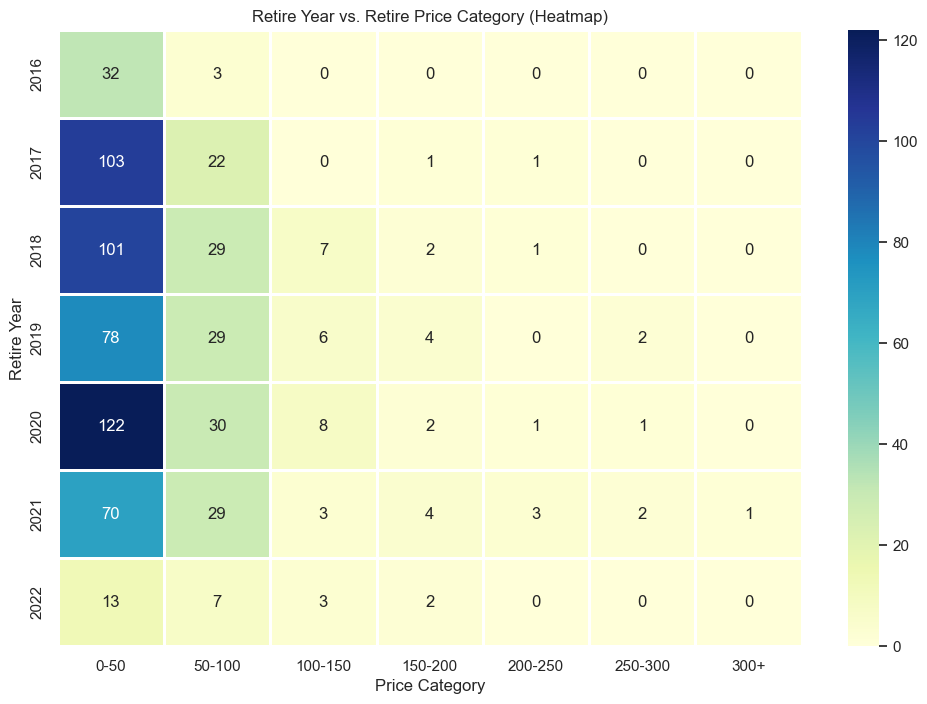

In [76]:
# Bin the retire months into per year bins
legoData['retire_year'] = pd.to_datetime(legoData['retire_month'], format='%b-%y').dt.year

# Create a pivot table for the heatmap
heatmap_pivot = legoData.pivot_table(index='retire_year', columns='price_category', values='set_id', aggfunc='count', observed=False)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(data=heatmap_pivot, linewidths=1, annot=True, fmt='g', annot_kws={"size": 12}, cmap="YlGnBu")
plt.title('Retire Year vs. Retire Price Category (Heatmap)')
plt.xlabel('Price Category')
plt.ylabel('Retire Year')
plt.show()


### Packaging Vs Retire Price

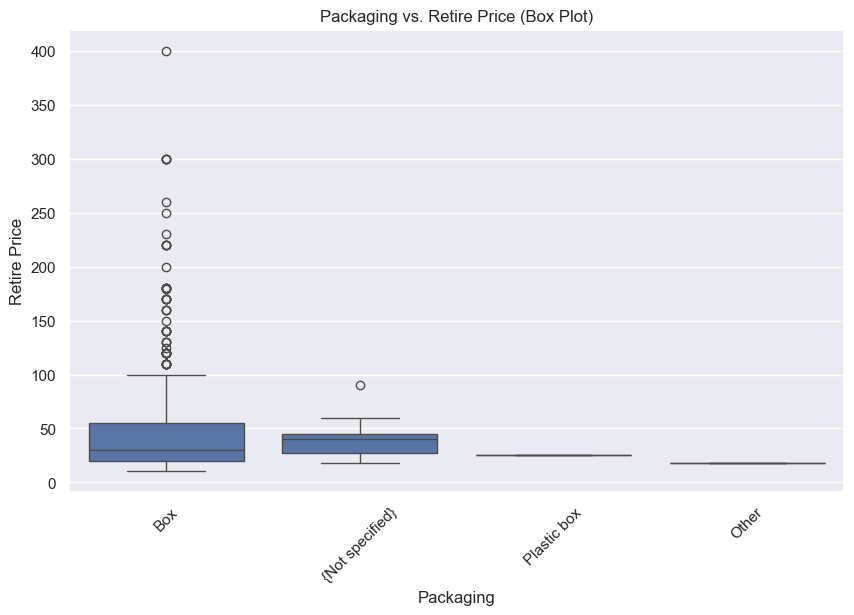

In [77]:
# Box plot for Packaging vs. Retire Price
plt.figure(figsize=(10, 6))
sb.boxplot(data=legoData, x='Packaging', y='retail_price')
plt.title('Packaging vs. Retire Price (Box Plot)')
plt.xlabel('Packaging')
plt.ylabel('Retire Price')
plt.xticks(rotation=45)
plt.show()

### Num of Instructions Vs Retire Price

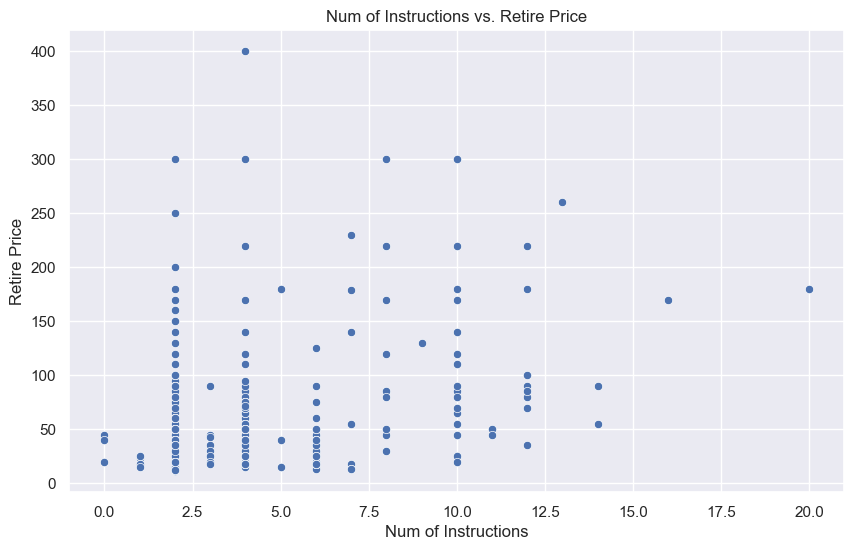

In [78]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=legoData, x='Num_Instructions', y='retail_price')
plt.title('Num of Instructions vs. Retire Price')
plt.xlabel('Num of Instructions')
plt.ylabel('Retire Price')
plt.show()


### Availability Vs Retire Price

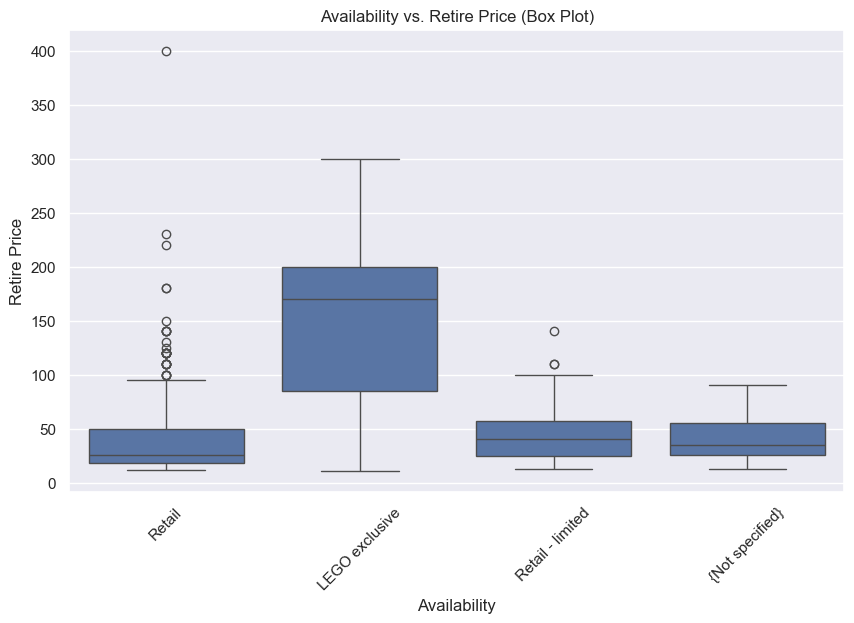

In [79]:
# Box plot for Availability vs. Retire Price
plt.figure(figsize=(10, 6))
sb.boxplot(data=legoData, x='Availability', y='retail_price')
plt.title('Availability vs. Retire Price (Box Plot)')
plt.xlabel('Availability')
plt.ylabel('Retire Price')
plt.xticks(rotation=45)
plt.show()

### Minifigures Vs Retire Price

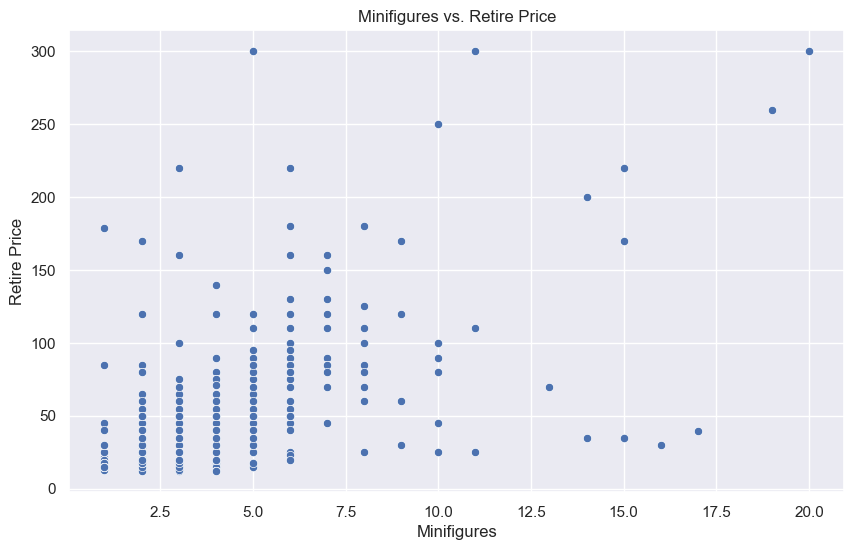

In [80]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=legoData, x='Minifigures', y='retail_price')
plt.title('Minifigures vs. Retire Price')
plt.xlabel('Minifigures')
plt.ylabel('Retire Price')
plt.show()


<Figure size 1200x800 with 0 Axes>

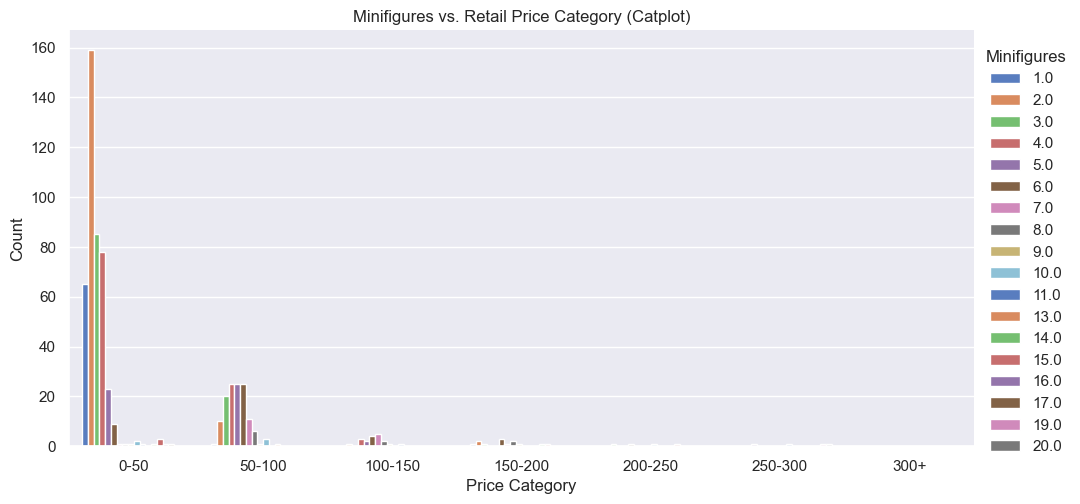

In [81]:
# Bin the retail prices
legoData['price_category'] = pd.cut(legoData['retail_price'], bins=price_bins, labels=price_labels, right=False)

# Plot the catplot
plt.figure(figsize=(12, 8))
sb.catplot(x='price_category', kind='count', data=legoData, hue='Minifigures', palette='muted', aspect=2)
plt.title('Minifigures vs. Retail Price Category (Catplot)')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()